In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
%matplotlib inline

In [46]:
base = pd.read_csv('../dataset/credit-data.csv')

In [47]:
base.loc[base['age']<0]

,clientid,income,age,loan,default
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [48]:
#apagar coluna intteira
#base.drop('age',1,inplace=True)

In [49]:
base.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [50]:

#base.drop(base[base.age < 0].index,inplace=True)

In [51]:
base['age'].mean()

40.80755937840458

In [52]:
base['age'][base.age > 0].mean()

40.92770044906149

In [53]:
base.loc[base.age <0,'age']=40.92

In [54]:
base['age'].mean()

40.92768888103586

In [55]:
#pd.isnull(base['age'])
base.loc[pd.isnull(base['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [56]:
previsores = base.iloc[:,1:4].values
classe = base.iloc[:,4]

In [57]:
imputer = imputer.fit(previsores[:,0:3])
previsores[:,0:3] = imputer.transform(previsores[:,0:3])

In [58]:
scaler = StandardScaler()
previsores = scaler.fit_transform(previsores)

In [59]:
xtrain, xtest, ytrain, ytest = train_test_split(previsores, classe, test_size=0.2, random_state=42)

In [60]:
clf = DecisionTreeClassifier()

In [61]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [62]:
pred = clf.predict(xtest)

In [63]:
accuracy_score(ytest,pred)

0.9825

In [64]:
matrix = confusion_matrix(ytest,pred)

In [65]:
matrix

array([[328,   2],
       [  5,  65]])

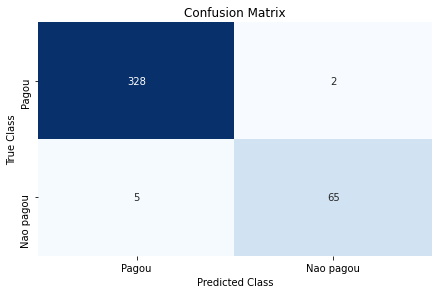

In [66]:
dataframe = pd.DataFrame(matrix, index=['Pagou','Nao pagou'], columns=['Pagou','Nao pagou'])
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues",fmt='g')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()